In [2]:
import tensorflow as tf
import os

In [3]:
gpus=tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
data_dir='/Users/delta/ML/HappyAndSad/data'
os.listdir(os.path.join(data_dir,'happy'))

['images26.jpg',
 'images32.jpg',
 'image34.jpeg',
 '05-12-21-happy-people.jpg',
 'image22.jpeg',
 'Happy.jpg',
 'images123.jpg',
 'images137.jpg',
 'images136.jpg',
 'images122.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'py-company-team-colleagues-jumping-flat-winning-characters-collection-vector.jpg',
 '170404-happy-workers-feature.jpg',
 'images33.jpg',
 'images27.jpg',
 'image18.jpeg',
 'images31.jpg',
 'images25.jpg',
 'images19.jpg',
 'image38.jpeg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '106701784-1600112459978-gettyimages-1210809980-3q4a2717.jpeg',
 'images134.jpg',
 'images120.jpg',
 'images108.jpg',
 'o-HAPPY-facebook.jpg',
 'IMG_20210827_200655.jpg',
 'image-38.jpeg',
 'images109.jpg',
 'images121.jpg',
 'images135.jpg',
 'images18.jpg',
 'ing-victory-dancing-money-fans-over-brick-wall-background-panorama-312382946.jpg',
 'images24.jpg',
 'images30.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'images34.jpg',
 'maxresdefault2.

In [6]:
image_exts=['jpeg','jpg','bmp','png']

In [9]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [11]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in extension list {}'.format(image_path))
        os.remove(image_path)
    except:
      print('Issue with image {}'.format(image_path))

In [12]:
#img=cv2.imread(image_path)
#plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#plt.show()
#to view at an img

In [13]:
import numpy as np
data=tf.keras.utils.image_dataset_from_directory(data_dir)
tf.keras.utils.image_dataset_from_directory??

Found 637 files belonging to 2 classes.


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [14]:
data_iterator=data.as_numpy_iterator()

In [15]:
batch=data_iterator.next()

In [16]:
#images represented as numpy arrays
batch[0]

array([[[[ 41.       ,  40.       ,  46.       ],
         [ 41.       ,  40.       ,  46.       ],
         [ 41.       ,  40.       ,  46.       ],
         ...,
         [ 41.       ,  40.       ,  46.       ],
         [ 40.73516  ,  39.73516  ,  45.73516  ],
         [ 40.490234 ,  39.490234 ,  45.490234 ]],

        [[ 41.       ,  40.       ,  46.       ],
         [ 41.       ,  40.       ,  46.       ],
         [ 41.       ,  40.       ,  46.       ],
         ...,
         [ 41.       ,  40.       ,  46.       ],
         [ 41.       ,  40.       ,  46.       ],
         [ 41.       ,  40.       ,  46.       ]],

        [[ 41.       ,  40.       ,  46.       ],
         [ 41.       ,  40.       ,  46.       ],
         [ 41.       ,  40.       ,  46.       ],
         ...,
         [ 41.       ,  40.       ,  46.       ],
         [ 41.234398 ,  40.234398 ,  46.234398 ],
         [ 41.45117  ,  40.45117  ,  46.45117  ]],

        ...,

        [[ 39.       ,  38.       ,  4

In [16]:
batch[1]
#0 = happy, 1= sad

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

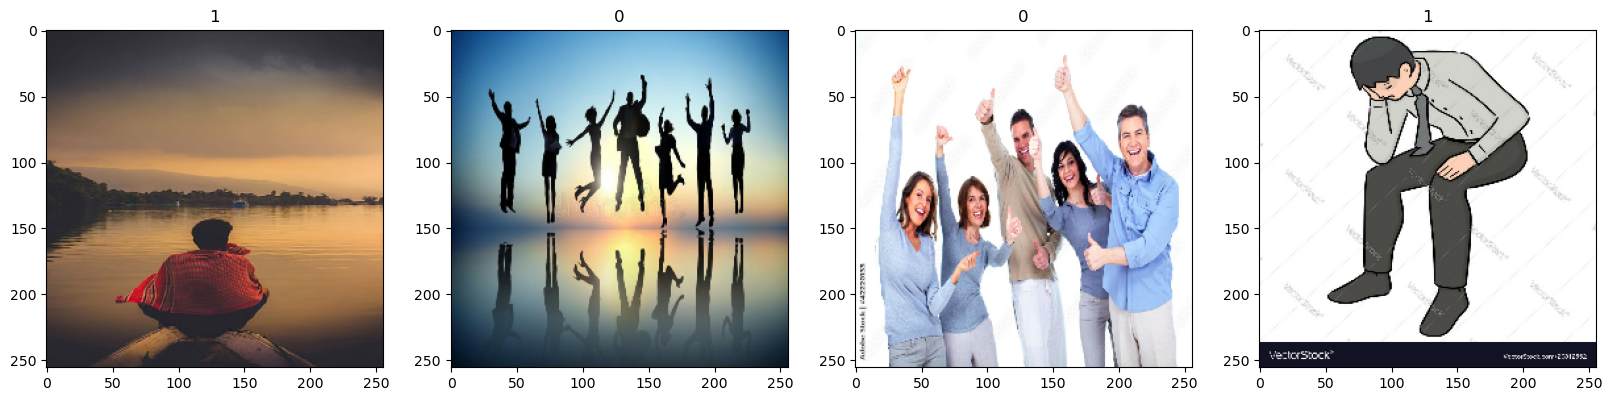

In [17]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][0:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [19]:
scaled_data=data.map( lambda x,y: (x/255,y))

In [20]:
batch=scaled_data.as_numpy_iterator().next()
batch[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

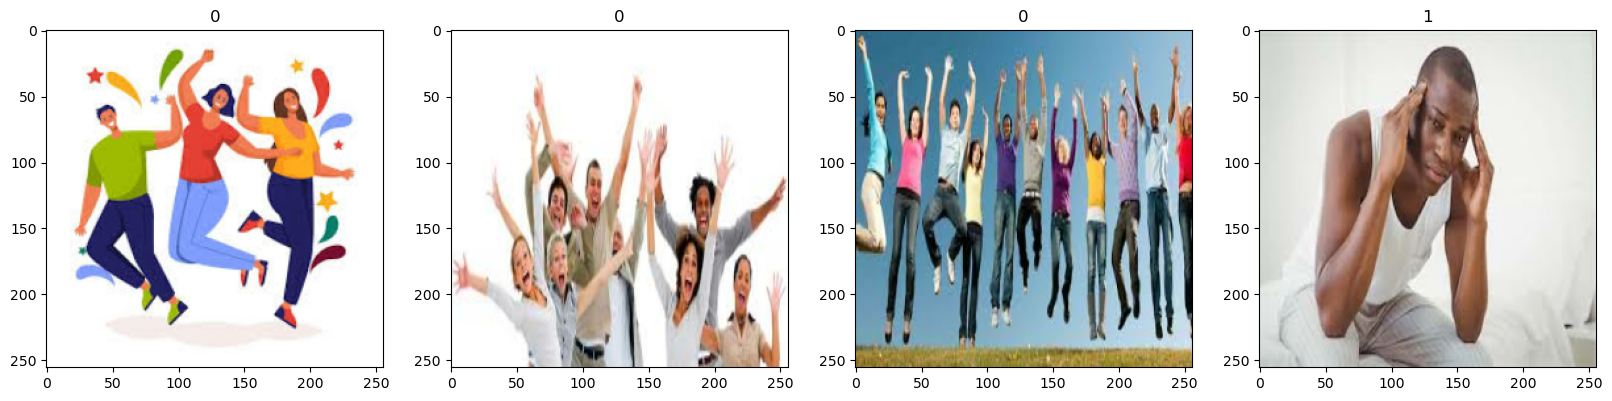

In [21]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][0:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [21]:
len(data)

20

In [23]:
 train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)
train_size,val_size,test_size

(14, 4, 2)

In [24]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input

In [26]:
model=Sequential()
model.add(Input(shape=(256, 256, 3)))

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.00005) ,loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,383,473 (28.17 MB)

 Trainable params: 7,383,473 (28.17 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
logdir='logs'

In [30]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=50,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 508ms/step - accuracy: 0.4596 - loss: 41.3897 - val_accuracy: 0.5234 - val_loss: 21.3684
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 510ms/step - accuracy: 0.4571 - loss: 14.2965 - val_accuracy: 0.5312 - val_loss: 2.7627
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 472ms/step - accuracy: 0.6285 - loss: 2.6318 - val_accuracy: 0.7344 - val_loss: 0.8877
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 469ms/step - accuracy: 0.6772 - loss: 1.6426 - val_accuracy: 0.7734 - val_loss: 1.1886
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 472ms/step - accuracy: 0.7762 - loss: 0.7972 - val_accuracy: 0.8359 - val_loss: 0.5055
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 497ms/step - accuracy: 0.8383 - loss: 0.4397 - val_accuracy: 0.7812 - val_loss: 0.6252
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 494ms/step - accuracy: 0.8313 - loss: 0.5662 - val_accuracy: 0.9062 - val_loss: 0.2564
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 469ms/step - accuracy: 0.9028 - loss: 0.2641 - val_accuracy:

In [ ]:
hist.history

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.ylim(0,0.3)
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
plt.ylim(0.85,1)
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# here starts the evaluation of the model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
precision=Precision()
recall=Recall()
acc=BinaryAccuracy()

In [ ]:
# though there is only one batch we will run a loop over every batch possible
for batch in test.as_numpy_iterator():
    X_test,Y_test=batch
    Y_pred=model.predict(X_test)
    precision.update_state(Y_test,Y_pred)
    recall.update_state(Y_test,Y_pred)
    acc.update_state(Y_test,Y_pred)

In [ ]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{acc.result().numpy()}')

In [ ]:
# here starts the testing phase
test_image=(cv2.cvtColor(cv2.imread('/Users/delta/Desktop/05-12-21-happy-people.jpg'),cv2.COLOR_BGR2RGB))
plt.imshow(test_image)
plt.show()

In [ ]:
resize_test_image=tf.image.resize(test_image,(256,256))
plt.imshow(resize_test_image.numpy().astype(int))
plt.show()

In [ ]:
test_ans=model.predict(np.expand_dims(resize_test_image/255,0))

In [ ]:
test_ans

In [ ]:
if test_ans>0.5:
    print("The image is sad")
else:
    print("The image is happy")

In [ ]:
from tensorflow.keras.models import load_model


model.save(os.path.join(data_dir,'happysadmodel.h5'))

In [ ]:
new_model=load_model(os.path.join(data_dir,'happysadmodel.h5'))

In [ ]:
y_pred=new_model.predict(np.expand_dims(resize_test_image/255,0))
y_pred

In [ ]:
if y_pred>0.5:
    print("Image is sad")
else:
    print("Image is happy")